心得報告:這次的作業我學到如何用hough和radon轉換找出線條，我一開始在做hough轉換時看到轉換的圖很奇怪，線條非常粗，我才發現我傳入hough的影像是原圖，而不是邊界影像，用canny處理後的圖再轉換，結果看起來就合理多了，此外執行radon轉換比hough轉換更花時間。




製作一Python程式，使用Hough Transform找影像中的線段

<Figure size 640x480 with 0 Axes>

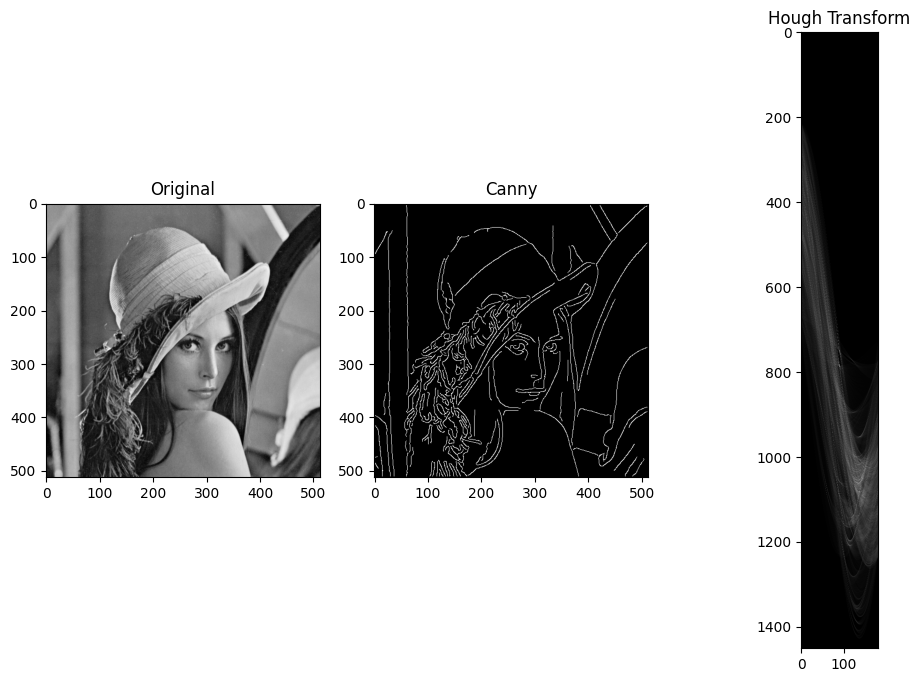

<Figure size 640x480 with 0 Axes>

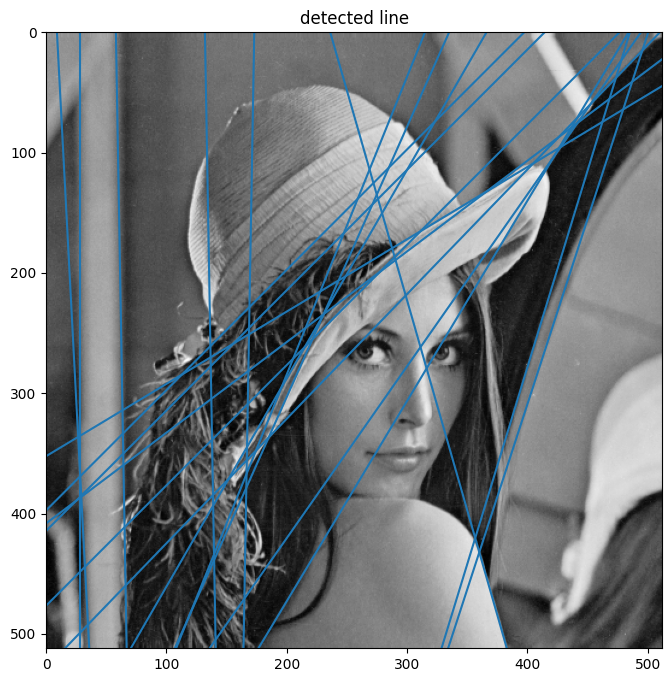

execution time: 1.420472 秒


In [ ]:
from skimage import io,feature
from skimage.transform import hough_line,hough_line_peaks
import numpy as np
import matplotlib.pyplot as plt
import time

start_time=time.process_time()  #start timming
img = io.imread('lena.png',as_gray=True)
#mg = io.imread('cameraman.tif')
img_edge=feature.canny(img,sigma=2)
h,theta,distance = hough_line(img_edge)#hough transform

fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(131)
ax1.imshow(img,cmap='gray')
ax1.set_title('Original')

ax2 = fig.add_subplot(132)
ax2.imshow(img_edge,cmap='gray')
ax2.set_title('Canny')

ax3 = fig.add_subplot(133)
ax3.imshow(h,cmap='gray')
ax3.set_title('Hough Transform')

fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title('detected line')
ax.imshow(img,cmap='gray')
ax.set_ylim((img.shape[0],0))
ax.set_xlim((0,img.shape[1]))
for _, angle, dist in zip(*hough_line_peaks(h, theta, distance)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi / 2))
plt.show()
end_time=time.process_time()# end timing
print(f"execution time: {end_time - start_time:.6f} 秒")

製作一Python程式，使用Radon Transform找影像中的線段

<Figure size 640x480 with 0 Axes>

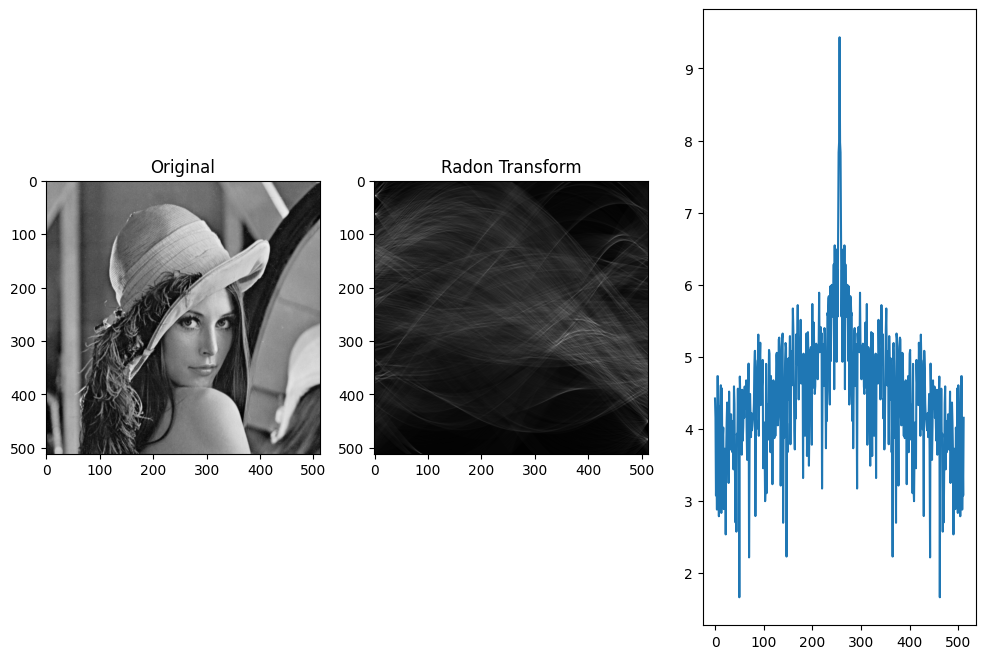

execution time: 6.314462 秒


In [ ]:
from skimage import io,feature
from skimage.transform import radon
import numpy as np
import matplotlib.pyplot as plt
import time
from numpy.fft import *

start_time=time.process_time()  #start timming
img = io.imread('lena.png',as_gray=True)
#mg = io.imread('cameraman.tif')
img_edge=feature.canny(img,sigma=2)

theta = np.linspace(0.0, 180.0, max(img.shape), endpoint=False)
img_radon = radon(img_edge, theta=theta)
c30=fftshift(fft(img_radon[:,30]))
c30L=np.log(1+np.abs(c30))

fig = plt.figure()
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(131)
ax1.imshow(img_org,cmap='gray')
ax1.set_title('Original')

ax2 = fig.add_subplot(132)
ax2.imshow(img_radon,cmap='gray')
ax2.set_title('Radon Transform')

ax3 = fig.add_subplot(133)
ax3.plot(c30L)


plt.show()
end_time=time.process_time()# end timing
print(f"execution time: {end_time - start_time:.6f} 秒")

/usr/local/lib/python3.10/dist-packages/skimage/transform/radon_transform.py:74: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn(


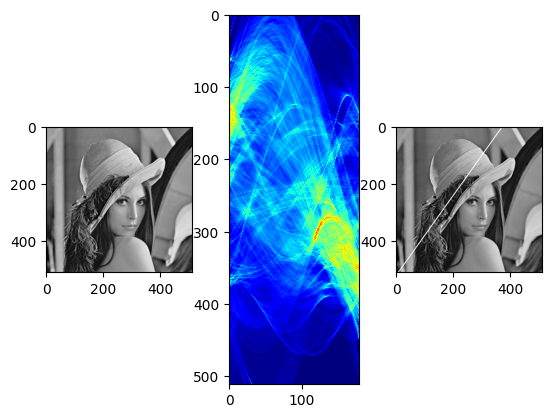

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from numpy.fft import fft, fft2, fftshift
import skimage.transform as tr
img_org = cv2.imread('lena.png',0)
img = cv2.imread('lena.png',0)
edges = cv2.Canny(img,50, 200)
rad = tr.radon(edges)
r, theta = np.where(rad == np.max(rad[:]))
for i in range(r.shape[0]):
  a = np.cos(theta[i])
  b = np.sin(theta[i])
  x0 = a*r[i]
  y0 = b*r[i]
  x1 = int(x0 + 1000*(-b))
  y1 = int(y0 + 1000*(a))
  x2 = int(x0 - 1000*(-b))
  y2 = int(y0 - 1000*(a))
  cv2.line(img,(x1,y1),(x2,y2),(255,255,255),2)
fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1.imshow(img_org,cmap='gray')
ax2 = fig.add_subplot(132)
ax2.imshow(rad,cmap='jet')
ax3 = fig.add_subplot(133)
ax3.imshow(img,cmap = 'gray')
#ax3.plot(rad)
plt.show()